In [1]:
import pvl
import struct
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os.path
import binascii

In [2]:
lo_file = '/home/arsanders/testData/lo/case03/input/3083_med_tohi_isis2.cub'

In [3]:
header = pvl.load(lo_file)

In [4]:
header

PVLModule([
  ('CCSD3ZF0000100000001NJPL3IF0PDS200000001', 'SFDU_LABEL')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 512)
  ('FILE_RECORDS', 167)
  ('LABEL_RECORDS', 25)
  ('FILE_STATE', 'CLEAN')
  ('^HISTORY', 26)
  ('HISTORY', PVLObject([]))
  ('^QUBE', 148)
  ('QUBE',
   {'AXES': 3,
    'AXIS_NAME': ['SAMPLE', 'LINE', 'BAND'],
    'BAND_BIN': {'BAND_BIN_CENTER': 1.0,
                 'BAND_BIN_ORIGINAL_BAND': 1,
                 'BAND_BIN_UNIT': 'NONE'},
    'CORE_BASE': 0.0,
    'CORE_HIGH_INSTR_SATURATION': 255,
    'CORE_HIGH_REPR_SATURATION': 255,
    'CORE_ITEMS': [100, 100, 1],
    'CORE_ITEM_BYTES': 1,
    'CORE_ITEM_TYPE': 'PC_UNSIGNED_INTEGER',
    'CORE_LOW_INSTR_SATURATION': 0,
    'CORE_LOW_REPR_SATURATION': 0,
    'CORE_MULTIPLIER': 1.0,
    'CORE_NAME': 'RAW_DATA_NUMBER',
    'CORE_NULL': 0,
    'CORE_UNIT': 'NONE',
    'CORE_VALID_MINIMUM': 1,
    'IMAGE_NUMBER': '308300',
    'ISIS_GEOMETRY': {'BASE_KERNELS': ['/usgs/cpkgs/isis2/lsb/isisd/data/mk98264a.tls',

In [5]:
with open(lo_file, 'rb') as f:
    image_offset = (header["^QUBE"]-1)* header["RECORD_BYTES"]
    f.seek(image_offset)
    b_image_data = f.read()

In [6]:
n_lines = 5
line_length = header['QUBE']['CORE_ITEMS'][0] * (header['QUBE']['CORE_ITEM_BYTES'])

In [7]:
image_data = []
for j in range(n_lines):
    image_sample = np.frombuffer(b_image_data[j*line_length:(j+1)*line_length], dtype=np.uint8, count=int(line_length))
    image_data.append(image_sample)
image_data = np.array(image_data)

In [8]:
image_data.shape

(5, 100)

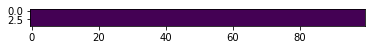

In [9]:
plt.imshow(image_data)

In [10]:
class RealIsisCubeLabelEncoder(pvl.encoder.IsisCubeLabelEncoder):    
    def encode_time(self, value):
        if value.microsecond:
            second = u'%02d.%06d' % (value.second, value.microsecond)
        else:
            second = u'%02d' % value.second

        time = u'%02d:%02d:%s' % (value.hour, value.minute, second)
        return time.encode('utf-8')

In [11]:
image_fn, image_ext = os.path.splitext(lo_file)
mini_image_fn = image_fn + '_cropped' + image_ext
mini_image_bn = os.path.basename(mini_image_fn)

# Overwrite the number of lines in the label

header['^QUBE'] = pvl._collections.Units(len(pvl.dumps(header, cls=RealIsisCubeLabelEncoder)), 'BYTES')
header['QUBE']['CORE_ITEMS'][1] = n_lines

In [12]:
header

PVLModule([
  ('CCSD3ZF0000100000001NJPL3IF0PDS200000001', 'SFDU_LABEL')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 512)
  ('FILE_RECORDS', 167)
  ('LABEL_RECORDS', 25)
  ('FILE_STATE', 'CLEAN')
  ('^HISTORY', 26)
  ('HISTORY', PVLObject([]))
  ('^QUBE', Units(value=4104, units='BYTES'))
  ('QUBE',
   {'AXES': 3,
    'AXIS_NAME': ['SAMPLE', 'LINE', 'BAND'],
    'BAND_BIN': {'BAND_BIN_CENTER': 1.0,
                 'BAND_BIN_ORIGINAL_BAND': 1,
                 'BAND_BIN_UNIT': 'NONE'},
    'CORE_BASE': 0.0,
    'CORE_HIGH_INSTR_SATURATION': 255,
    'CORE_HIGH_REPR_SATURATION': 255,
    'CORE_ITEMS': [100, 5, 1],
    'CORE_ITEM_BYTES': 1,
    'CORE_ITEM_TYPE': 'PC_UNSIGNED_INTEGER',
    'CORE_LOW_INSTR_SATURATION': 0,
    'CORE_LOW_REPR_SATURATION': 0,
    'CORE_MULTIPLIER': 1.0,
    'CORE_NAME': 'RAW_DATA_NUMBER',
    'CORE_NULL': 0,
    'CORE_UNIT': 'NONE',
    'CORE_VALID_MINIMUM': 1,
    'IMAGE_NUMBER': '308300',
    'ISIS_GEOMETRY': {'BASE_KERNELS': ['/usgs/cpkgs/isis2/ls

In [13]:
label_fn, label_ext = os.path.splitext(lo_file)
out_label = label_fn + '_cropped' + label_ext

pvl.dump(header, out_label, cls=RealIsisCubeLabelEncoder)
pvl.dumps(header)

b'CCSD3ZF0000100000001NJPL3IF0PDS200000001 = SFDU_LABEL\r\nRECORD_TYPE = FIXED_LENGTH\r\nRECORD_BYTES = 512\r\nFILE_RECORDS = 167\r\nLABEL_RECORDS = 25\r\nFILE_STATE = CLEAN\r\n^HISTORY = 26\r\nBEGIN_OBJECT = HISTORY\r\nEND_OBJECT = HISTORY\r\n^QUBE = 4104 <BYTES>\r\nBEGIN_OBJECT = QUBE\r\n  AXES = 3\r\n  AXIS_NAME = (SAMPLE, LINE, BAND)\r\n  CORE_ITEMS = (100, 5, 1)\r\n  CORE_ITEM_BYTES = 1\r\n  CORE_ITEM_TYPE = PC_UNSIGNED_INTEGER\r\n  CORE_BASE = 0.0\r\n  CORE_MULTIPLIER = 1.0\r\n  CORE_VALID_MINIMUM = 1\r\n  CORE_NULL = 0\r\n  CORE_LOW_REPR_SATURATION = 0\r\n  CORE_LOW_INSTR_SATURATION = 0\r\n  CORE_HIGH_INSTR_SATURATION = 255\r\n  CORE_HIGH_REPR_SATURATION = 255\r\n  SUFFIX_BYTES = 4\r\n  SUFFIX_ITEMS = (0, 0, 0)\r\n  CORE_NAME = RAW_DATA_NUMBER\r\n  CORE_UNIT = NONE\r\n  IMAGE_NUMBER = "308300"\r\n  OUTPUT_MICRON = 50um\r\n  PRODUCT_ID = 3083M\r\n  BEGIN_GROUP = BAND_BIN\r\n    BAND_BIN_UNIT = NONE\r\n    BAND_BIN_ORIGINAL_BAND = 1\r\n    BAND_BIN_CENTER = 1.0\r\n  END_GROUP = BA

In [14]:
with open(mini_image_fn, 'ab+') as f:
    b_reduced_image_data = image_data.tobytes()
    f.seek(0, 2)
    f.write(b'\n')
    f.write(b_reduced_image_data)